In [1]:
import numpy as np
import astropy.io.fits as pf
from astropy.table import Table, vstack
import pylab as mplot
import sys
sys.path.insert(0,'/project2/chihway/virtualenvs/midway2_python3/lib/python3.7/site-packages')
sys.path.insert(0,'/project2/chihway/chihway/y3-6x2pt/measurement/src')
sys.path.insert(0,'/project2/chihway/code/destest')

import yaml
import destest
import h5py
import catalog_utils
import shutil

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['vstack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
desy1_data = pf.open('/project2/chihway/data/des_y1_catalogs/mcal-y1a1-combined-riz-unblind-v4-matched.fits')[1].data
flags = desy1_data['flags']

In [3]:
desy1 = pf.open('/project2/chihway/data/des_y1_catalogs/mcal-y1a1-combined-riz-unblind-v4-matched.fits')
desy1[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  614 / width of table in bytes                        
NAXIS2  =            136930995 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   80 / number of fields in each row                   
TTYPE1  = 'coadd_objects_id'   / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'flags   '           / label for field   2                            
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE3  = 'mask_frac'       

In [4]:
# help(destest)

In [5]:
# Read yaml file that defines all the catalog selections used
params = yaml.safe_load(open('/project2/chihway/data/des_y3_catalogs/y3kp_sample/Feb2021/cats.yaml'))
params['param_file'] = 'cats.yaml'


source_selector, source_calibrator = catalog_utils.load_catalog(params, 'mcal', 'mcal', 
                params['source_group'], params['source_table'], params['source_path'], 
                return_calibrator=destest.MetaCalib)

# gold_selector = catalog_utils.load_catalog(
#     params, 'gold', 'mcal', params['gold_group'], params['gold_table'],
#     params['gold_path'], inherit=source_selector)

# pz_selector = catalog_utils.load_catalog(params, 'pz', 'mcal', params['pz_group'], 
#                        params['pz_table'], params['pz_path'], inherit=source_selector)

# Dictionary with the unsheared version of each quantity with the 
source_5sels = {}
source_5sels['unsheared'] = {}
source_5sels['unsheared']['flux_i'] = [source_selector.get_col('flux_i', uncut=True)[0][source_selector.get_mask()[i]] for i in range(1)]
# source_5sels['unsheared']['flux_r'] = [source_selector.get_col('flux_r', uncut=True)[0][source_selector.get_mask()[i]] for i in range(5)]
# source_5sels['unsheared']['flux_z'] = [source_selector.get_col('flux_z', uncut=True)[0][source_selector.get_mask()[i]] for i in range(5)]


['T', 'T_err', 'covmat_0_1', 'covmat_1_1', 'covmat_2_2', 'e_1', 'e_2', 'flux_err_i', 'flux_err_r', 'flux_err_z', 'flux_i', 'flux_r', 'flux_z', 'size_ratio', 'snr', 'weight']
using select_path for mask
destest /project2/chihway/data/des_y3_catalogs/y3kp_sample/Feb2021/Y3_mastercat_02_05_21.h5 index/select 399263026 100204026
end mask [     7390      7391      7393 ... 399243228 399243235 399243240] [ True  True  True ...  True  True  True]
R11 not in sheared cols
R11 not in sheared cols
R11 not in sheared cols
R11 not in sheared cols
R22 not in sheared cols
R22 not in sheared cols
R22 not in sheared cols
R22 not in sheared cols
skipping sheared columns for e_1
skipping sheared columns for e_1
skipping sheared columns for e_1
skipping sheared columns for e_1
skipping sheared columns for e_2
skipping sheared columns for e_2
skipping sheared columns for e_2
skipping sheared columns for e_2


In [6]:
ids = np.arange(len(source_5sels['unsheared']['flux_i'][0]))
np.random.shuffle(ids)

# flux_y3_i = source_5sels['unsheared']['flux_i'][0][:100000]

# del source_5sels
# del source_selector
# del source_calibrator

In [2]:
new = Table.read('metacal_test.fits')

In [8]:
new.info()

<Table length=1481545>
         name          dtype  shape 
--------------------- ------- ------
                   id   int64       
                    x float64       
                    y float64       
           mcal_flags   int64       
            good_frac float64       
   mcal_psf_g_noshear float64   (2,)
   mcal_psf_T_noshear float64       
    mcal_nfev_noshear   int32       
     mcal_s2n_noshear float64       
   mcal_s2n_r_noshear float64       
    mcal_pars_noshear float64   (8,)
mcal_pars_cov_noshear float64 (8, 8)
       mcal_g_noshear float64   (2,)
   mcal_g_cov_noshear float64 (2, 2)
       mcal_T_noshear float64       
   mcal_T_err_noshear float64       
 mcal_T_ratio_noshear float64       
    mcal_flux_noshear float64   (3,)
mcal_flux_cov_noshear float64 (3, 3)
mcal_flux_err_noshear float64   (3,)
         mcal_nfev_1p   int32       
          mcal_s2n_1p float64       
        mcal_s2n_r_1p float64       
         mcal_pars_1p float64   (8,)
     mcal_pars_

/tmp/ipykernel_50376/793948833.py:2: RuntimeWarning: invalid value encountered in log10
  mplot.hist2d(np.log10(new['mcal_s2n_noshear']),new['mcal_g_noshear'][:,0], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())


Text(0, 0.5, 'e1 delve')

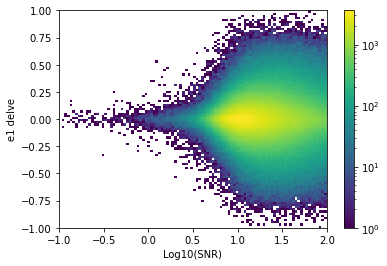

In [6]:
import matplotlib.colors as colors
mplot.hist2d(np.log10(new['mcal_s2n_noshear']),new['mcal_g_noshear'][:,0], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())
mplot.colorbar()
mplot.xlabel('Log10(SNR)')
mplot.ylabel('e1 delve')


/tmp/ipykernel_50376/776538276.py:1: RuntimeWarning: invalid value encountered in log10
  mplot.hist2d(np.log10(new['mcal_s2n_noshear']),new['mcal_g_noshear'][:,1], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())


Text(0, 0.5, 'e2 new')

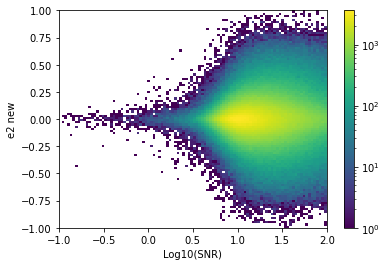

In [7]:
mplot.hist2d(np.log10(new['mcal_s2n_noshear']),new['mcal_g_noshear'][:,1], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())
mplot.colorbar()
mplot.xlabel('Log10(SNR)')
mplot.ylabel('e2 new')


/tmp/ipykernel_50376/1094523115.py:1: RuntimeWarning: invalid value encountered in log10
  mplot.hist2d(np.log10(desy1_data['snr'][flags==0]),desy1_data['e1'][flags==0], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())


Text(0, 0.5, 'e1 des')

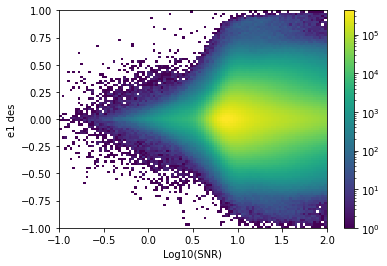

In [8]:
mplot.hist2d(np.log10(desy1_data['snr'][flags==0]),desy1_data['e1'][flags==0], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())
mplot.colorbar()
mplot.xlabel('Log10(SNR)')
mplot.ylabel('e1 des')

/tmp/ipykernel_50376/3068073915.py:1: RuntimeWarning: invalid value encountered in log10
  mplot.hist2d(np.log10(desy1_data['snr'][flags==0]),desy1_data['e2'][flags==0], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())


Text(0, 0.5, 'e2 des')

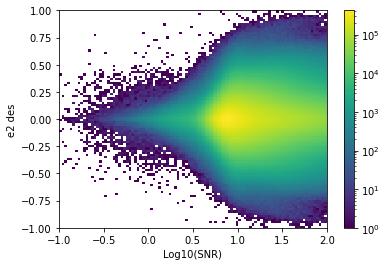

In [9]:
mplot.hist2d(np.log10(desy1_data['snr'][flags==0]),desy1_data['e2'][flags==0], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())
mplot.colorbar()
mplot.xlabel('Log10(SNR)')
mplot.ylabel('e2 des')

### Response for all

In [5]:
mask0 = (~((new['mcal_T_noshear']>2)*(new['mcal_s2n_noshear']<30)))*(new['mcal_T_noshear']<10)*(new['mcal_s2n_noshear']<1000)*(new['mcal_s2n_noshear']>10)*(new['mcal_T_ratio_noshear']>0.5)
mask_1p = (~((new['mcal_T_1p']>2)*(new['mcal_s2n_1p']<30)))*(new['mcal_T_1p']<10)*(new['mcal_s2n_1p']<1000)*(new['mcal_s2n_1p']>10)*(new['mcal_T_ratio_1p']>0.5)
mask_1m = (~((new['mcal_T_1m']>2)*(new['mcal_s2n_1m']<30)))*(new['mcal_T_1m']<10)*(new['mcal_s2n_1m']<1000)*(new['mcal_s2n_1m']>10)*(new['mcal_T_ratio_1m']>0.5)
mask_2p = (~((new['mcal_T_2p']>2)*(new['mcal_s2n_2p']<30)))*(new['mcal_T_2p']<10)*(new['mcal_s2n_2p']<1000)*(new['mcal_s2n_2p']>10)*(new['mcal_T_ratio_2p']>0.5)
mask_2m = (~((new['mcal_T_2m']>2)*(new['mcal_s2n_2m']<30)))*(new['mcal_T_2m']<10)*(new['mcal_s2n_2m']<1000)*(new['mcal_s2n_2m']>10)*(new['mcal_T_ratio_2m']>0.5)

# calcualte metacalibration factors
dgamma = 2*0.01

# add weights to everything

print("DELVE")

R11  = (np.mean(new['mcal_g_1p'][:,0][mask0]) - np.mean(new['mcal_g_1m'][:,0][mask0]))/dgamma
R11s = (np.mean(new['mcal_g_noshear'][:,0][mask_1p]) - np.mean(new['mcal_g_noshear'][:,0][mask_1m]))/dgamma
R11tot = R11 + R11s
print('R11_g', R11, 'R11_s', R11s)
print('R11 tot', R11tot)

R22  = (np.mean(new['mcal_g_2p'][:,1][mask0]) - np.mean(new['mcal_g_2m'][:,1][mask0]))/dgamma
R22s = (np.mean(new['mcal_g_noshear'][:,1][mask_2p]) - np.mean(new['mcal_g_noshear'][:,1][mask_2m]))/dgamma
R22tot = R22 + R22s
print('R22_g', R22, 'R22_s', R22s)
print('R22 tot', R22tot)

print(len(new['mcal_g_2p'][:,1][mask0])*1.0/(100*0.5*60*60))

DELVE
R11_g 0.6877756054878961 R11_s 0.024025018858142944
R11 tot 0.711800624346039
R22_g 0.6785939855514995 R22_s 0.021822504697228975
R22 tot 0.7004164902487285
4.0506166666666665


In [10]:
mask0_des = (desy1_data['flags']*desy1_data['flags_select']==0)*(desy1_data['snr']>10)*(desy1_data['size']/desy1_data['psf_size']>0.5)
# mask_1p = (desy1_data['flags']*desy1_data['flags_select_1p']==0)*(desy1_data['snr_1p']>10)*(desy1_data['size_1p']/desy1_data['psf_size']>0.5)
# mask_1m = (desy1_data['flags']*desy1_data['flags_select_1m']==0)*(desy1_data['snr_1m']>10)*(desy1_data['size_1m']/desy1_data['psf_size']>0.5)
# mask_2p = (desy1_data['flags']*desy1_data['flags_select_2p']==0)*(desy1_data['snr_2p']>10)*(desy1_data['size_2p']/desy1_data['psf_size']>0.5)
# mask_2m = (desy1_data['flags']*desy1_data['flags_select_2m']==0)*(desy1_data['snr_2m']>10)*(desy1_data['size_2m']/desy1_data['psf_size']>0.5)

# # calcualte metacalibration factors
# dgamma = 2*0.01

# # add weights to everything

# print("DES Y1")

# R11  = (np.mean(desy1_data['e1_1p'][mask0_des]) - np.mean(desy1_data['e1_1m'][mask0_des]))/dgamma
# R11s = (np.mean(desy1_data['e1'][mask_1p]) - np.mean(desy1_data['e1'][mask_1m]))/dgamma
# R11tot_des = R11 + R11s
# print('R11_g', R11, 'R11_s', R11s)
# print('R11 tot', R11tot_des)

# R22  = (np.mean(desy1_data['e2_2p'][mask0_des]) - np.mean(desy1_data['e2_2m'][mask0_des]))/dgamma
# R22s = (np.mean(desy1_data['e2'][mask_2p]) - np.mean(desy1_data['e2'][mask_2m]))/dgamma
# R22tot_des = R22 + R22s
# print('R22_g', R22, 'R22_s', R22s)
# print('R22 tot', R22tot_des)


# Histogram everything

### Shear

In [27]:
# help(mplot.hist)

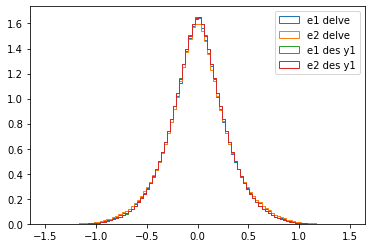

In [28]:
mplot.hist(new['mcal_g_noshear'][:,0][mask0]/R11tot, range=(-1.5,1.5), bins=100, histtype='step', label='e1 delve', stacked=True, density=True)
mplot.hist(new['mcal_g_noshear'][:,1][mask0]/R22tot, range=(-1.5,1.5), bins=100, histtype='step', label='e2 delve', stacked=True, density=True)

mplot.hist(desy1_data['e1'][mask0_des]/R11tot_des, range=(-1.5,1.5), bins=100, histtype='step', label='e1 des y1', stacked=True, density=True)
mplot.hist(desy1_data['e2'][mask0_des]/R22tot_des, range=(-1.5,1.5), bins=100, histtype='step', label='e2 des y1', stacked=True, density=True)

mplot.legend()

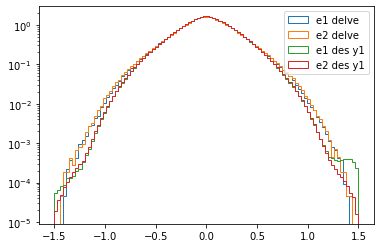

In [29]:
mplot.hist(new['mcal_g_noshear'][:,0][mask0]/R11tot, range=(-1.5,1.5), bins=100, histtype='step', label='e1 delve', stacked=True, density=True)
mplot.hist(new['mcal_g_noshear'][:,1][mask0]/R22tot, range=(-1.5,1.5), bins=100, histtype='step', label='e2 delve', stacked=True, density=True)

mplot.hist(desy1_data['e1'][mask0_des]/R11tot_des, range=(-1.5,1.5), bins=100, histtype='step', label='e1 des y1', stacked=True, density=True)
mplot.hist(desy1_data['e2'][mask0_des]/R22tot_des, range=(-1.5,1.5), bins=100, histtype='step', label='e2 des y1', stacked=True, density=True)


mplot.yscale('log')
mplot.legend()

### PSF ellipticity

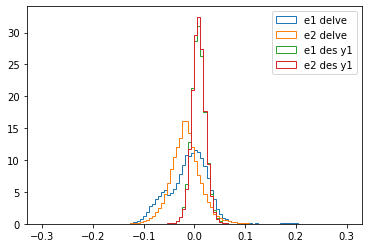

In [30]:
mplot.hist(new['mcal_psf_g_noshear'][:,0][mask0], range=(-0.3,0.3), bins=100, histtype='step', label='e1 delve', stacked=True, density=True)
mplot.hist(new['mcal_psf_g_noshear'][:,1][mask0], range=(-0.3,0.3), bins=100, histtype='step', label='e2 delve', stacked=True, density=True)

mplot.hist(desy1_data['psf_e1'][mask0_des], range=(-0.3,0.3), bins=100, histtype='step', label='e1 des y1', stacked=True, density=True)
mplot.hist(desy1_data['psf_e2'][mask0_des], range=(-0.3,0.3), bins=100, histtype='step', label='e2 des y1', stacked=True, density=True)

mplot.legend()

### PSF size

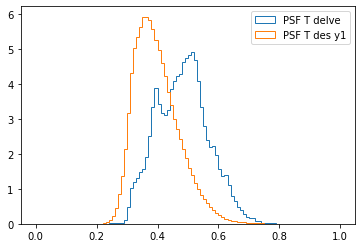

In [31]:
mplot.hist(new['mcal_psf_T_noshear'][mask0], bins=100, histtype='step', label='PSF T delve', range=(0,1), stacked=True, density=True)
mplot.hist(desy1_data['psf_size'][mask0_des], bins=100, histtype='step', label='PSF T des y1', range=(0,1), stacked=True, density=True)

mplot.legend()

### S2N

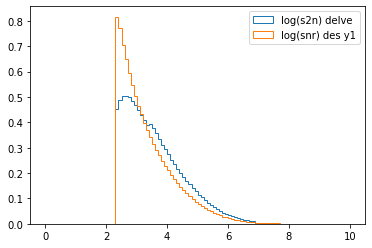

In [32]:
mplot.hist(np.log(new['mcal_s2n_noshear'][mask0]), range=(0,10), bins=100, histtype='step', label='log(s2n) delve', stacked=True, density=True)
# mplot.hist(np.log(new['mcal_s2n_r_noshear'][mask0]), bins=100, histtype='step', label='r-band s2n delve', stacked=True, density=True)

mplot.hist(np.log(desy1_data['snr'][mask0_des]), range=(0,10), bins=100, histtype='step', label='log(snr) des y1', stacked=True, density=True)


mplot.legend()

### Mcal parameters

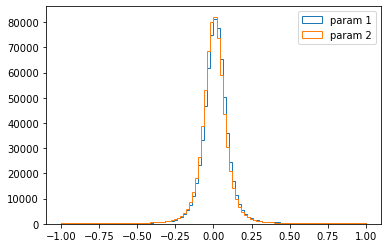

In [33]:
mplot.hist(new['mcal_pars_noshear'][:,0][mask0], range=(-1,1), bins=100, histtype='step', label='param 1')
mplot.hist(new['mcal_pars_noshear'][:,1][mask0], range=(-1,1), bins=100, histtype='step', label='param 2')

mplot.legend()


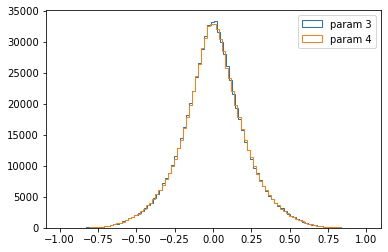

In [34]:
mplot.hist(new['mcal_pars_noshear'][:,2][mask0], bins=100, histtype='step', label='param 3')
mplot.hist(new['mcal_pars_noshear'][:,3][mask0], bins=100, histtype='step', label='param 4')

mplot.legend()


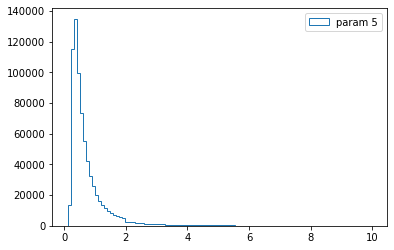

In [35]:
mplot.hist(new['mcal_pars_noshear'][:,4][mask0], bins=100, histtype='step', label='param 5')

mplot.legend()


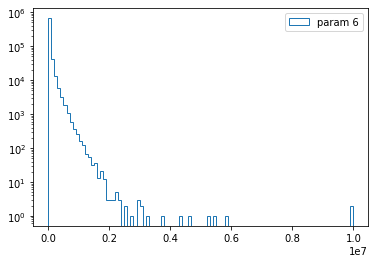

In [36]:
mplot.hist(new['mcal_pars_noshear'][:,5][mask0], bins=100, histtype='step', label='param 6')

mplot.yscale('log')
mplot.legend()


/tmp/ipykernel_50376/754100182.py:1: RuntimeWarning: invalid value encountered in log
  mplot.hist(np.log(new['mcal_pars_noshear'][:,6][mask0]), bins=100, histtype='step', label='log(param 7)')


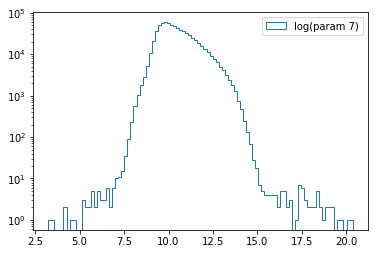

In [37]:
mplot.hist(np.log(new['mcal_pars_noshear'][:,6][mask0]), bins=100, histtype='step', label='log(param 7)')

mplot.yscale('log')
mplot.legend()


/tmp/ipykernel_50376/4201319692.py:1: RuntimeWarning: invalid value encountered in log
  mplot.hist(np.log(new['mcal_pars_noshear'][:,7][mask0]), bins=100, histtype='step', label='log(param 8)')


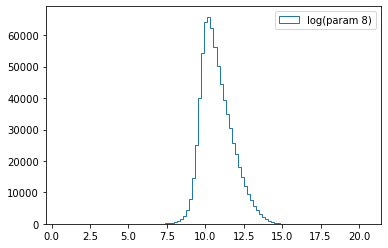

In [38]:
mplot.hist(np.log(new['mcal_pars_noshear'][:,7][mask0]), bins=100, histtype='step', label='log(param 8)')

mplot.legend()

### Size

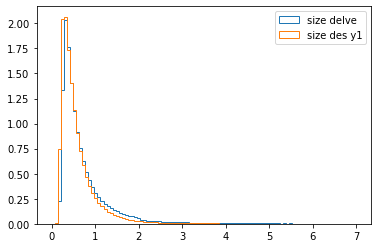

In [42]:
mplot.hist(new['mcal_T_noshear'][mask0], range=(0,7), bins=100, histtype='step', label='size delve', stacked=True, density=True)
mplot.hist(desy1_data['size'][mask0_des], range=(0,7), bins=100, histtype='step', label='size des y1', stacked=True, density=True)



mplot.legend()

### Size ratio

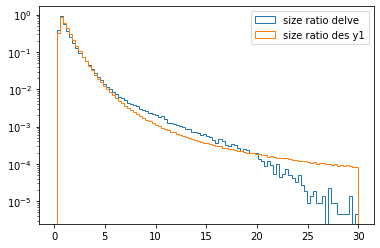

In [44]:
mplot.hist(new['mcal_T_ratio_noshear'][mask0], range=(0,30), bins=100, histtype='step', label='size ratio delve', stacked=True, density=True)
mplot.hist(desy1_data['size'][mask0_des]/desy1_data['psf_size'][mask0_des], range=(0,30), bins=100, histtype='step', label='size ratio des y1', stacked=True, density=True)

mplot.yscale('log')
mplot.legend()



### Flux

/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


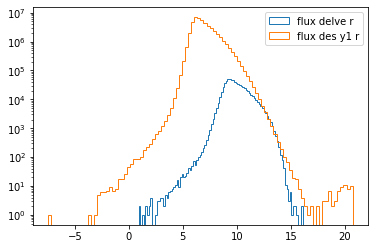

In [15]:
mplot.hist(np.log(new['mcal_flux_noshear'][mask0][:,0]), bins=100, histtype='step', label='flux delve r') #, stacked=True, density=True)
mplot.hist(np.log(desy1_data['flux_r'][mask0_des]), bins=100, histtype='step', label='flux des y1 r') #, stacked=True, density=True)
# mplot.hist(np.log(source_5sels['unsheared']['flux_r'][0], bins=100, histtype='step', label='flux des y3 r', stacked=True, density=True)

mplot.yscale('log')
mplot.legend()


Text(0, 0.5, 'Mcal flux i')

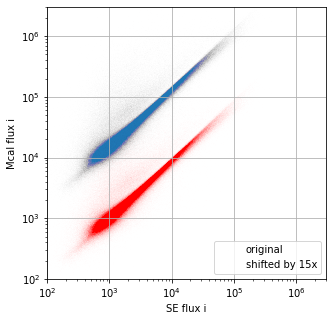

In [34]:
mplot.figure(figsize=(5,5))
mplot.scatter(new['flux_i'][mask0], new['mcal_flux_noshear'][mask0][:,1], marker='.', s=0.1, alpha=0.01, label='original')
mplot.scatter(new['flux_i'][mask0], new['mcal_flux_noshear'][mask0][:,1]/15, c='r', marker='.', s=0.1, alpha=0.01, label='shifted by 15x')

mplot.legend()
mplot.xscale('log')
mplot.yscale('log')
mplot.grid()
mplot.xlim(100,3000000)
mplot.ylim(100, 3000000)
mplot.xlabel('SE flux i')
mplot.ylabel('Mcal flux i')

Text(0, 0.5, 'Mcal flux r')

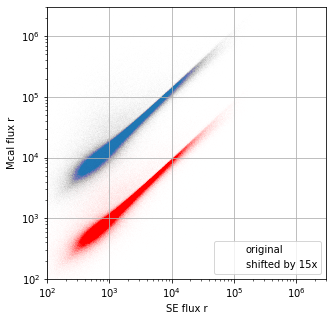

In [35]:
mplot.figure(figsize=(5,5))
mplot.scatter(new['flux_r'][mask0], new['mcal_flux_noshear'][mask0][:,0], marker='.', s=0.1, alpha=0.01, label='original')
mplot.scatter(new['flux_r'][mask0], new['mcal_flux_noshear'][mask0][:,0]/15, c='r', marker='.', s=0.1, alpha=0.01, label='shifted by 15x')

mplot.legend()
mplot.xscale('log')
mplot.yscale('log')
mplot.grid()
mplot.xlim(100,3000000)
mplot.ylim(100, 3000000)
mplot.xlabel('SE flux r')
mplot.ylabel('Mcal flux r')

Text(0, 0.5, 'Mcal flux z')

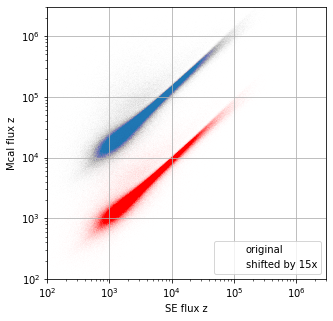

In [36]:
mplot.figure(figsize=(5,5))
mplot.scatter(new['flux_z'][mask0], new['mcal_flux_noshear'][mask0][:,2], marker='.', s=0.1, alpha=0.01, label='original')
mplot.scatter(new['flux_z'][mask0], new['mcal_flux_noshear'][mask0][:,2]/15, c='r', marker='.', s=0.1, alpha=0.01, label='shifted by 15x')

mplot.legend()
mplot.xscale('log')
mplot.yscale('log')
mplot.grid()
mplot.xlim(100,3000000)
mplot.ylim(100, 3000000)
mplot.xlabel('SE flux z')
mplot.ylabel('Mcal flux z')

/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


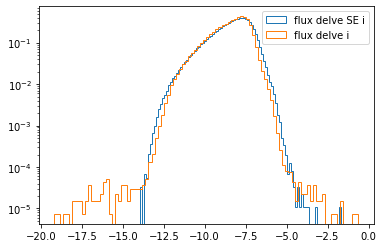

In [6]:
mplot.hist(-2.5*np.log10(new['flux_i'][mask0]), bins=100, histtype='step', label='flux delve SE i', stacked=True, density=True)
mplot.hist(-2.5*np.log10(new['mcal_flux_noshear'][mask0][:,1]*0.263**2), bins=100, histtype='step', label='flux delve i', stacked=True, density=True)
# mplot.hist(-2.5*np.log10(desy1_data['flux_i'][mask0_des]), bins=100, histtype='step', label='flux des y1 i', stacked=True, density=True)
# mplot.hist(-2.5*np.log10(source_5sels['unsheared']['flux_i'][0][ids[:100000]]), bins=100, histtype='step', label='flux des y3 i', stacked=True, density=True)


mplot.yscale('log')
mplot.legend()

In [ ]:
mplot.hist(-2.5*np.log10(new['mcal_flux_noshear'][mask0][:,1]), range=(-5,25), bins=100, histtype='step', label='flux delve i', stacked=True, density=True)
mplot.hist(-2.5*np.log10(desy1_data['flux_i'][mask0_des]), range=(-5,25), bins=100, histtype='step', label='flux des y1 i', stacked=True, density=True)
mplot.hist(-2.5*np.log10(source_5sels['unsheared']['flux_i'][0][ids[:100000]]), range=(-5,25), bins=100, histtype='step', label='flux des y3 i', stacked=True, density=True)


mplot.yscale('log')
mplot.legend()

/tmp/ipykernel_50376/4121363383.py:1: RuntimeWarning: invalid value encountered in log
  mplot.hist(np.log(new['mcal_flux_noshear'][mask0][:,2]), bins=100, histtype='step', label='flux delve z', stacked=True, density=True)
/tmp/ipykernel_50376/4121363383.py:2: RuntimeWarning: invalid value encountered in log
  mplot.hist(np.log(desy1_data['flux_z'][mask0_des]), bins=100, histtype='step', label='flux des y1 z', stacked=True, density=True)


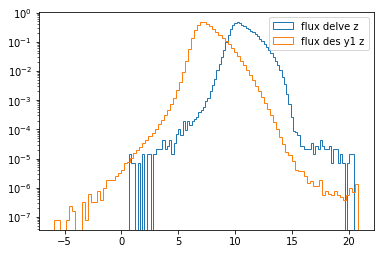

In [56]:
mplot.hist(np.log(new['mcal_flux_noshear'][mask0][:,2]), bins=100, histtype='step', label='flux delve z', stacked=True, density=True)
mplot.hist(np.log(desy1_data['flux_z'][mask0_des]), bins=100, histtype='step', label='flux des y1 z', stacked=True, density=True)


mplot.yscale('log')
mplot.legend()

# Now start doing mean shear vs. X

In [21]:
def mask_default(cat):
    mask0_default = (~((cat['mcal_T_noshear']>2)*(cat['mcal_s2n_noshear']<30)))*(cat['mcal_T_noshear']<10)*(cat['mcal_s2n_noshear']<1000)*(cat['mcal_s2n_noshear']>10)*(cat['mcal_T_ratio_noshear']>0.5)
    mask_1p_default = (~((cat['mcal_T_1p']>2)*(cat['mcal_s2n_1p']<30)))*(cat['mcal_T_1p']<10)*(cat['mcal_s2n_1p']<1000)*(cat['mcal_s2n_1p']>10)*(cat['mcal_T_ratio_1p']>0.5)
    mask_1m_default = (~((cat['mcal_T_1m']>2)*(cat['mcal_s2n_1m']<30)))*(cat['mcal_T_1m']<10)*(cat['mcal_s2n_1m']<1000)*(cat['mcal_s2n_1m']>10)*(cat['mcal_T_ratio_1m']>0.5)
    mask_2p_default = (~((cat['mcal_T_2p']>2)*(cat['mcal_s2n_2p']<30)))*(cat['mcal_T_2p']<10)*(cat['mcal_s2n_2p']<1000)*(cat['mcal_s2n_2p']>10)*(cat['mcal_T_ratio_2p']>0.5)
    mask_2m_default = (~((cat['mcal_T_2m']>2)*(cat['mcal_s2n_2m']<30)))*(cat['mcal_T_2m']<10)*(cat['mcal_s2n_2m']<1000)*(cat['mcal_s2n_2m']>10)*(cat['mcal_T_ratio_2m']>0.5)

    return mask0_default, mask_1p_default, mask_1m_default, mask_2p_default, mask_2m_default


In [22]:
def get_Rs(cat, m0, m_1p, m_1m, m_2p, m_2m):
    
    # calcualte metacalibration factors
    dgamma = 2*0.01
    
    R11  = (np.mean(cat['mcal_g_1p'][:,0][m0]) - np.mean(cat['mcal_g_1m'][:,0][m0]))/dgamma
    R11s = (np.mean(cat['mcal_g_noshear'][:,0][m_1p]) - np.mean(cat['mcal_g_noshear'][:,0][m_1m]))/dgamma
    R11tot = R11 + R11s

    R22  = (np.mean(cat['mcal_g_2p'][:,1][m0]) - np.mean(cat['mcal_g_2m'][:,1][m0]))/dgamma
    R22s = (np.mean(cat['mcal_g_noshear'][:,1][m_2p]) - np.mean(cat['mcal_g_noshear'][:,1][m_2m]))/dgamma
    R22tot = R22 + R22s
    
    return R11tot, R22tot
    

In [23]:
def calibrate_bin_X(cat, tag, lim1, lim2):
    
    df0, df_1p, df_1m, df_2p, df_2m = mask_default(cat)
    
    mask0 = df0*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_1p = df_1p*(cat[tag+'_1p']>lim1)*(cat[tag+'_1p']<=lim2)
    mask_1m = df_1m*(cat[tag+'_1m']>lim1)*(cat[tag+'_1m']<=lim2)
    mask_2p = df_2p*(cat[tag+'_2p']>lim1)*(cat[tag+'_2p']<=lim2)
    mask_2m = df_2m*(cat[tag+'_2m']>lim1)*(cat[tag+'_2m']<=lim2)
    
    R11tot, R22tot = get_Rs(cat, mask0, mask_1p, mask_1m, mask_2p, mask_2m)
    
    e1 = cat['mcal_g_noshear'][:,0][mask0]/R11tot
    e2 = cat['mcal_g_noshear'][:,1][mask0]/R22tot

    return np.mean(e1), np.mean(e2),np.std(e1)/np.sqrt(len(e1)), np.std(e2)/np.sqrt(len(e2)),len(e1), len(e2)


In [24]:
def calibrate_bin_Y(cat, tag, lim1, lim2):
    
    df0, df_1p, df_1m, df_2p, df_2m = mask_default(cat)
    
    mask0 = df0*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_1p = df_1p*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_1m = df_1m*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_2p = df_2p*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_2m = df_2m*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    
    R11tot, R22tot = get_Rs(cat, mask0, mask_1p, mask_1m, mask_2p, mask_2m)
    
    e1 = cat['mcal_g_noshear'][:,0][mask0]/R11tot
    e2 = cat['mcal_g_noshear'][:,1][mask0]/R22tot

    return np.mean(e1), np.mean(e2),np.std(e1)/np.sqrt(len(e1)), np.std(e2)/np.sqrt(len(e2)),len(e1), len(e2)


In [25]:
def calibrate_bin_Z(cat, tag, n, lim1, lim2):
    
    df0, df_1p, df_1m, df_2p, df_2m = mask_default(cat)
    
    mask0 = df0*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    mask_1p = df_1p*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    mask_1m = df_1m*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    mask_2p = df_2p*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    mask_2m = df_2m*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    
    R11tot, R22tot = get_Rs(cat, mask0, mask_1p, mask_1m, mask_2p, mask_2m)
    
    e1 = cat['mcal_g_noshear'][:,0][mask0]/R11tot
    e2 = cat['mcal_g_noshear'][:,1][mask0]/R22tot

    return np.mean(e1), np.mean(e2),np.std(e1)/np.sqrt(len(e1)), np.std(e2)/np.sqrt(len(e2)),len(e1), len(e2)


### Mean shear vs. SNR

In [26]:
XX = []
SNR = []
for i in range(20):
    snr1 = 10**(1+i*0.1)
    snr2 = 10**(1+i*0.1+0.1)
    X = calibrate_bin_X(new, 'mcal_s2n', snr1, snr2)
    XX.append(X)
    SNR.append(10**(1+i*0.1+0.05))
XX = np.array(XX)

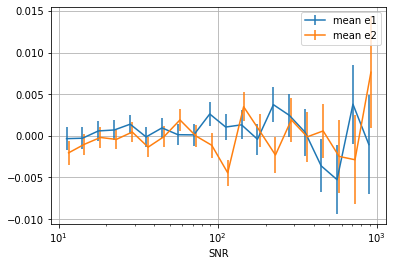

In [27]:
SNR = np.array(SNR)
mplot.errorbar(SNR, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(SNR*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xscale('log')
mplot.xlabel('SNR')
mplot.legend()
mplot.grid()

### Mean shear vs. size ratio

In [28]:
XX = []
Size = []
for i in range(15):
    size1 = 0.5+0.2*i
    size2 = 0.5+0.2*i+0.2
    X = calibrate_bin_X(new, 'mcal_T_ratio', size1, size2)
    XX.append(X)
    Size.append(0.5+0.2*i+0.1)
XX = np.array(XX)

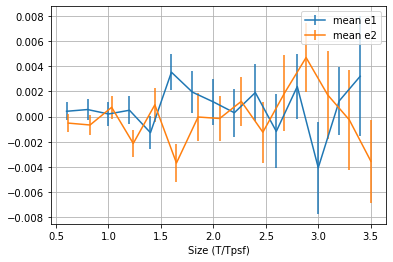

In [29]:
Size = np.array(Size)
mplot.errorbar(Size, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(Size*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xlabel('Size (T/Tpsf)')
mplot.legend()
mplot.grid()

### Mean shear vs. PSF size

In [30]:
XX = []
Size = []
for i in range(10):
    size1 = 0.3+0.04*i
    size2 = 0.3+0.04*i+0.04
    X = calibrate_bin_Y(new, 'mcal_psf_T', size1, size2)
    XX.append(X)
    Size.append(0.3+0.04*i+0.02)
XX = np.array(XX)

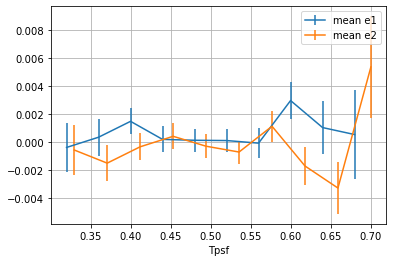

In [31]:
Size = np.array(Size)
mplot.errorbar(Size, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(Size*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xlabel('Tpsf')
mplot.legend()
mplot.grid()

### PSF e1, e2

In [32]:
XX = []
E1 = []
for i in range(20):
    ee1 = -0.1+0.01*i
    ee2 = -0.1+0.01*i+0.01
    X = calibrate_bin_Z(new, 'mcal_psf_g', 0, ee1, ee2)
    XX.append(X)
    E1.append(-0.1+0.01*i+0.005)
XX = np.array(XX)

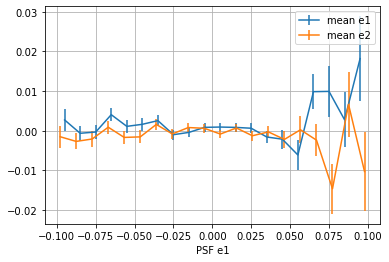

In [33]:
E1 = np.array(E1)
mplot.errorbar(E1, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(E1*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xlabel('PSF e1')
mplot.legend()
mplot.grid()

In [34]:
XX = []
E2 = []
for i in range(20):
    ee1 = -0.1+0.01*i
    ee2 = -0.1+0.01*i+0.01
    X = calibrate_bin_Z(new, 'mcal_psf_g', 1, ee1, ee2)
    XX.append(X)
    E2.append(-0.1+0.01*i+0.005)
XX = np.array(XX)

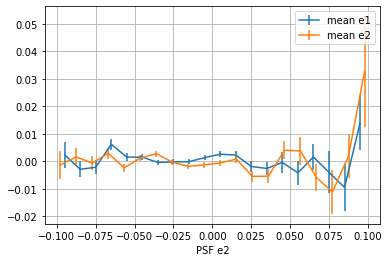

In [35]:
E2 = np.array(E2)
mplot.errorbar(E2, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(E2*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xlabel('PSF e2')
mplot.legend()
mplot.grid()